(100, 2)
(100,)


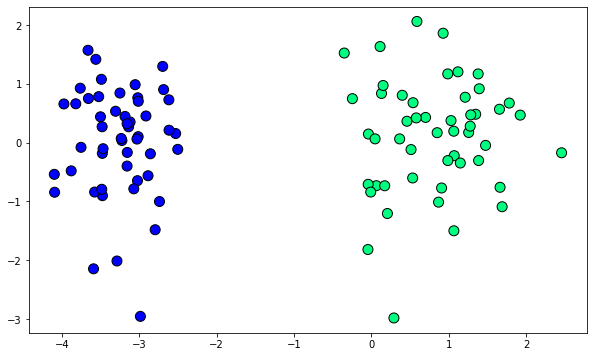

In [46]:
# create a custom classification dataset
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=20)

# plot the dataset
from matplotlib import pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(X[:,0], X[:,1], marker='o', c=y, s=100, edgecolor='k', cmap='winter')

# Get shape of training set
print(X.shape)
print(y.shape)

In [47]:
import numpy as np

def step(x):
    return 1 if x > 0 else 0

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# create a perceptron function
def perceptron(X, y, func):
    # insert column of 1s as the first entry in X
    X = np.insert(X, 0, 1, axis=1)
    # initialize the weights to zero
    W = np.zeros(X.shape[1])
    # set the learning rate
    learning_rate = 0.1
    # set the number of epochs
    epochs = 1000
    
    # loop over the epochs
    for epoch in range(epochs):
        # randomly select a data point
        j = np.random.randint(0, X.shape[0])
        # calculate the prediction, shape of X[j] is (3,) and shape of W is (3,), so the dot product is a scalar
        y_pred_j = func(np.dot(X[j], W))
        # update the weights
        W = W + learning_rate * (y[j] - y_pred_j) * X[j]

    return W

In [48]:
# Perceptron with step function
InterceptStep, Coef1Step, Coef2Step = perceptron(X, y, step)
print("InterceptStep: ", InterceptStep)
print("Coef1Step: ", Coef1Step)
print("Coef2Step: ", Coef2Step)

InterceptStep:  0.1
Coef1Step:  0.3342522767976952
Coef2Step:  0.04413689285949324


In [49]:
# Perceptron with sigmoid function
InterceptSigmoid, Coef1Sigmoid, Coef2Sigmoid = perceptron(X, y, sigmoid)
print("InterceptSigmoid: ", InterceptSigmoid)
print("Coef1Sigmoid: ", Coef1Sigmoid)
print("Coef2Sigmoid: ", Coef2Sigmoid)

InterceptSigmoid:  2.782902284383849
Coef1Sigmoid:  2.764222886442682
Coef2Sigmoid:  0.09482445645280169


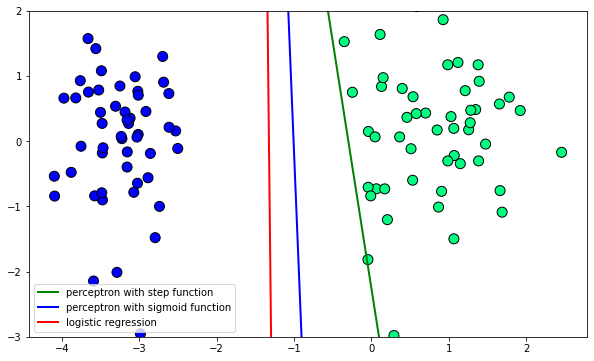

In [50]:
# apply sklearn logistic regression
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X, y)

# plot the dataset
plt.figure(figsize=(10,6))
plt.scatter(X[:,0], X[:,1], marker='o', c=y, s=100, edgecolor='k', cmap='winter')
# draw the perceptron line with step function
x1 = np.linspace(-2, 2, 100)
x2 = -(InterceptStep + Coef1Step*x1)/Coef2Step
plt.plot(x1, x2, color='g', linewidth=2, label='perceptron with step function')
# draw the perceptron line with sigmoid function
x1 = np.linspace(-2, 2, 100)
x2 = -(InterceptSigmoid + Coef1Sigmoid*x1)/Coef2Sigmoid
plt.plot(x1, x2, color='b', linewidth=2, label='perceptron with sigmoid function')
# draw the logistic regression line
x1 = np.linspace(-2, 2, 100)
x2 = -(clf.intercept_ + clf.coef_[0][0]*x1)/clf.coef_[0][1]
plt.plot(x1, x2, color='r', linewidth=2, label='logistic regression')
plt.ylim(-3,2)
plt.legend()
